In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
# To Plot matplotlib figures inline on the notebook
%matplotlib inline
from sklearn.metrics import r2_score

from sklearn.cross_validation import train_test_split

In [201]:
#rentals = pd.read_pickle('smallerpickledata')
#rentals = pd.read_pickle('allthedata')
rentals = pd.read_pickle('RankedNbhds')

In [202]:
del rentals['Pets']
del rentals['uFeatures']
del rentals['neighborhood']
del rentals['Address']
del rentals['Features']
del rentals['Kitchen']
del rentals['LivingSpace']
del rentals['Outdoor']
del rentals['Zip']

In [203]:
X = rentals.loc[:, rentals.columns != 'Rent']
y = rentals['Rent']

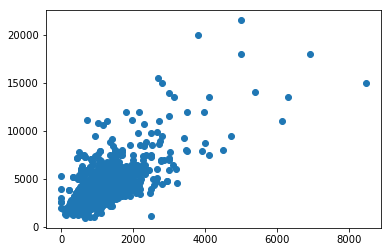

In [204]:
plt.scatter(X.Sqft, y)

In [205]:
feature_columns = X.columns

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [257]:
## To start, we will build a single tree
from sklearn import tree, ensemble

# Set some parameters
#dtrmodel = tree.DecisionTreeRegressor(min_samples_split=10, max_depth=4)
dtrmodel = tree.DecisionTreeRegressor(min_samples_split=10, max_depth=6, min_samples_leaf=8)

# Fit the model to some training data
dtrmodel.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [208]:
dtrmodel.tree_

In [209]:
# Export the structure of the tree to a file

tree.export_graphviz(dtrmodel, out_file='tree.dot',feature_names = X_train.columns)

In [210]:
# Look at the file (using ! for a command line access)
!head tree.dot

digraph Tree {
node [shape=box] ;
0 [label="Sqft <= 1359.0\nmse = 2340418.65\nsamples = 1929\nvalue = 3384.954"] ;
1 [label="Rank <= 37.5\nmse = 1044423.936\nsamples = 1700\nvalue = 3092.664"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Sqft <= 820.5\nmse = 641056.809\nsamples = 1144\nvalue = 2824.17"] ;
1 -> 2 ;
3 [label="Sqft <= 456.5\nmse = 429671.846\nsamples = 639\nvalue = 2514.225"] ;
2 -> 3 ;
4 [label="Sqft <= 265.0\nmse = 189900.9\nsamples = 77\nvalue = 1966.273"] ;


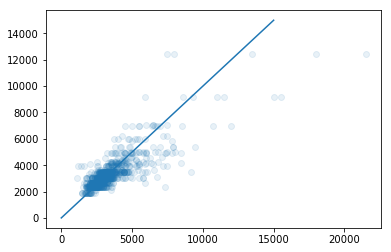

In [213]:
# Now let's predict on the test set and plot pred vs actual

tree_pred_test = dtrmodel.predict(X_test)
plt.scatter(y_test, tree_pred_test,alpha=.1)
plt.plot(np.linspace(0,15000,1000),np.linspace(0,15000,1000))


In [214]:
np.sqrt(np.mean((tree_pred_test - y_test)**2))

1033.8830856492398

In [215]:
#Random Forest time
from sklearn.ensemble import RandomForestRegressor

In [216]:
# Initialize the model, then fit it on the training data
rfmodel1 = RandomForestRegressor(n_estimators = 500, min_samples_leaf=5, max_features=4, n_jobs=-1)
rfmodel1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [217]:
# Use the trained model to predict the results on the test set

rf1_test_pred = rfmodel1.predict(X_test)

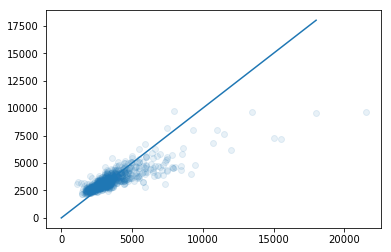

In [218]:
#Plot actual vs predicted
plt.scatter(y_test, rf1_test_pred,alpha=.1)
plt.plot(np.linspace(0,18000,1000),np.linspace(0,18000,1000))


In [219]:
np.sqrt(np.mean((rf1_test_pred - y_test)**2))

1095.6831269671402

In [220]:
rfmodel2=RandomForestRegressor(n_estimators = 1000, min_samples_leaf=1,  n_jobs=-1, max_features=4, min_impurity_split=300000) #Your parameters inside the parentheses
rfmodel2.fit(X_train,y_train)

/Users/bekcunning/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/bekcunning/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/bekcunning/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/bekcunning/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead

/Users/bekcunning/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/bekcunning/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/bekcunning/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/bekcunning/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead

/Users/bekcunning/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/bekcunning/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/bekcunning/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/bekcunning/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead

/Users/bekcunning/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/bekcunning/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/bekcunning/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/bekcunning/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead

/Users/bekcunning/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/bekcunning/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/bekcunning/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/bekcunning/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead

/Users/bekcunning/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/bekcunning/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/bekcunning/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/bekcunning/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=300000, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [221]:
rf2_test_pred = rfmodel2.predict(X_test)

In [222]:
np.sqrt(np.mean((rf2_test_pred - y_test)**2))

950.35247227201342

In [223]:
rfmodel3=RandomForestRegressor(n_estimators = 600, min_samples_leaf=1,  n_jobs=-1, max_features='sqrt') #Your parameters inside the parentheses
rfmodel3.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [224]:
rf3_test_pred = rfmodel3.predict(X_test)

In [225]:
np.sqrt(np.mean((rf3_test_pred - y_test)**2))
r2_score(y_test, rf3_test_pred)

0.73460830474512717

In [226]:
rfmodel3=RandomForestRegressor(n_estimators = 500, min_samples_leaf=1,  n_jobs=-1, max_features=8) #Your parameters inside the parentheses
rfmodel3.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [227]:
rf3_test_pred = rfmodel3.predict(X_test)

In [228]:
np.sqrt(np.mean((rf3_test_pred - y_test)**2))

915.33060068897157

In [229]:
r2_score(y_test, rf3_test_pred)

0.73420758016219956

In [230]:
list(zip(X_train.columns,rfmodel3.feature_importances_))

[('Bath', 0.14346127519113522),
 ('Beds', 0.12010246390777202),
 ('Parking', 0.0059865030098695156),
 ('Sqft', 0.3240676408046898),
 ('Rank', 0.21781804056284396),
 ('Pets Allowed', 0.016196385387028531),
 ('High Speed Internet Access', 0.013752232934385182),
 ('Ceiling Fan', 0.010216417221287187),
 ('Tub/Shower', 0.0082619673448310511),
 ('Double Vanities', 0.0011324213060095213),
 ('Alarm', 0.002612640362644152),
 ('Washer/Dryer', 0.020476527414198337),
 ('Air Conditioning', 0.011610829300148314),
 ('Storage Units', 0.0072703801258454269),
 ('Smoke Free', 0.013531801627632538),
 ('Fireplace', 0.006466688956766992),
 ('Heating', 0.011738951209049803),
 ('Cable Ready', 0.01020423725354711),
 ('Gated', 0.0072253455042044891),
 ('Balcony', 0.0098276888381424038),
 ('Patio', 0.0039305766072527904),
 ('Sundeck', 0.0084953236660398161),
 ('Courtyard', 0.0052354006105228851),
 ('Rooftop', 0.0073148491540771035),
 ('Grill', 0.0064697260126089862),
 ('Picnic Area', 0.0029612076190629892),
 ('W

In [231]:
r2_score(y_test, rf3_test_pred)

0.73420758016219956

In [232]:
#Gradient boosting
from sklearn.ensemble import GradientBoostingRegressor

In [247]:
gbmodel1 = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.01, max_depth=6, subsample=.2)

In [248]:
gbmodel1.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=5000, presort='auto', random_state=None,
             subsample=0.2, verbose=0, warm_start=False)

In [249]:
y_pred_gb1 = gbmodel1.predict(X_test)

In [250]:
np.sqrt(np.mean((y_pred_gb1 - y_test)**2))

847.00036379728499

In [251]:
np.mean(y_pred_gb1-y_test)

-36.11826918704115

In [252]:
feat_list = list(zip(X_train.columns, gbmodel1.feature_importances_))

In [253]:
r2_score(y_test, y_pred_gb1)

0.7724096616051358

In [186]:
sorted_scores = sorted(feat_list, key=lambda x: x[1], reverse=True)

In [187]:
sorted_scores

[('Sqft', 0.38586778702867641),
 ('Rank', 0.22733498373011984),
 ('Bath', 0.07392295290280973),
 ('Beds', 0.061058321270344974),
 ('Washer/Dryer', 0.019996610823556249),
 ('Smoke Free', 0.018303665617531103),
 ('Pets Allowed', 0.016922468747650226),
 ('Balcony', 0.016080967396382977),
 ('High Speed Internet Access', 0.01516008482192025),
 ('Air Conditioning', 0.014554845598023405),
 ('Parking', 0.014458097511504241),
 ('Heating', 0.013746636808408288),
 ('Cable Ready', 0.01335741104325415),
 ('Sundeck', 0.011928398306833538),
 ('Rooftop', 0.011020272673928255),
 ('Storage Units', 0.010322851659805361),
 ('Tub/Shower', 0.009807317408413594),
 ('Grill', 0.0096425458124366845),
 ('Gated', 0.0091090825264031425),
 ('Fireplace', 0.0087202783746337213),
 ('Patio', 0.0077710668546626142),
 ('Ceiling Fan', 0.0072332275435714292),
 ('Courtyard', 0.0056533139657809562),
 ('Waterfront', 0.0055844691773553959),
 ('Picnic Area', 0.0036974468362271271),
 ('Alarm', 0.0036749594911114052),
 ('Double V

In [190]:
from sklearn import linear_model

In [191]:
models = {}
models['lin_reg'] = linear_model.LinearRegression()
models['ridge'] = linear_model.Ridge()
models['lasso2'] = linear_model.Lasso(alpha=2)
models['lasso1'] = linear_model.Lasso(alpha=.2)
models['lasso'] = linear_model.Lasso(alpha=.02)
models['elasticnet'] = linear_model.ElasticNet()

In [192]:

for name,model in models.items():
    model.fit(X_train,y_train)
    print('Model: ' + name)
    print("Score: " + str(model.score(X_test,y_test)))
    sorted_features = sorted(zip(X_train.columns,model.coef_), key=lambda tup: abs(tup[1]), reverse=True)
    for feature in sorted_features:
        print(feature)
        
    print("")

Model: lin_reg
Score: 0.70640501381
('Bath', 413.10188763244452)
('Rooftop', 342.19252281848941)
('Tub/Shower', -289.97230481019523)
('Pets Allowed', 280.66760715621945)
('Washer/Dryer', 250.72358307689129)
('High Speed Internet Access', 231.2892765620594)
('Picnic Area', -216.83189601282623)
('Grill', 194.69138813258002)
('Porch', 179.60980963314634)
('Double Vanities', 161.66235306944489)
('Patio', -159.76926760855392)
('Courtyard', -151.10975632410978)
('Waterfront', -110.38581273307882)
('Parking', 98.36659178739896)
('Sundeck', 95.015949244697836)
('Storage Units', 80.825383212094948)
('Fireplace', -64.684301136282585)
('Yard', 54.352596365006121)
('Alarm', 49.780219737580019)
('Lawn', 35.636483318479733)
('Ceiling Fan', -35.177075493022983)
('Garden', -32.320094269188068)
('Smoke Free', 22.693960287737639)
('Gated', 20.198117093160604)
('Deck', -19.950132239754147)
('Rank', 19.094031970944183)
('Air Conditioning', -15.727705430789982)
('Cable Ready', -14.955614916368162)
('Beds',

In [196]:
from sklearn import model_selection
for name,model in models.items():
    score = model_selection.cross_val_score(model,X_test, y_test, n_jobs=1)
    print('Model: ' + name)
    #print(score)
    print("Score: " + str(np.mean(score)) + " with STD: " + str(np.std(score)))
    sorted_features = sorted(zip(X_train.columns,model.coef_), key=lambda tup: abs(tup[1]), reverse=True)
    for feature in sorted_features:
        print(feature)
        
    print("")

Model: lin_reg
Score: 0.711873103506 with STD: 0.0187546598739
('Bath', 413.10188763244452)
('Rooftop', 342.19252281848941)
('Tub/Shower', -289.97230481019523)
('Pets Allowed', 280.66760715621945)
('Washer/Dryer', 250.72358307689129)
('High Speed Internet Access', 231.2892765620594)
('Picnic Area', -216.83189601282623)
('Grill', 194.69138813258002)
('Porch', 179.60980963314634)
('Double Vanities', 161.66235306944489)
('Patio', -159.76926760855392)
('Courtyard', -151.10975632410978)
('Waterfront', -110.38581273307882)
('Parking', 98.36659178739896)
('Sundeck', 95.015949244697836)
('Storage Units', 80.825383212094948)
('Fireplace', -64.684301136282585)
('Yard', 54.352596365006121)
('Alarm', 49.780219737580019)
('Lawn', 35.636483318479733)
('Ceiling Fan', -35.177075493022983)
('Garden', -32.320094269188068)
('Smoke Free', 22.693960287737639)
('Gated', 20.198117093160604)
('Deck', -19.950132239754147)
('Rank', 19.094031970944183)
('Air Conditioning', -15.727705430789982)
('Cable Ready', -1

In [199]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
# Train and Score Decision Tree Regressor (base learner)
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
print('Decision Tree Score: ' + str(dt.score(X_test, y_test)))

# Train and Score Bagged Tree Regressor (ensemble learner)
bagged_tree = BaggingRegressor(DecisionTreeRegressor())
bagged_tree.fit(X_train, y_train)
print('Bagged Tree Score: ' + str(bagged_tree.score(X_test, y_test)))

Decision Tree Score: 0.449162454563
Bagged Tree Score: 0.698345202099
Woohoo!


In [258]:
models = {}
parameters = {}

models['linear_model'] = linear_model.LinearRegression()
models['ridge_model'] = linear_model.Ridge()
models['lasso_model'] = linear_model.Lasso(alpha=.5)
models['robust_regression'] = linear_model.SGDRegressor(loss='huber',n_iter=20)
models['eps_insensitive'] = linear_model.SGDRegressor(loss='epsilon_insensitive',n_iter=20)


models['cart'] = tree.DecisionTreeRegressor(max_depth=7)
models['extratrees'] = tree.ExtraTreeRegressor(max_depth=7)
models['randomForest'] = ensemble.RandomForestRegressor()
models['adaboostedTrees'] = ensemble.AdaBoostRegressor()
models['gradboostedTrees'] = ensemble.GradientBoostingRegressor()


for name,model in models.items():
    scores = model_selection.cross_val_score(model, X, y, n_jobs=1)
    print('Model: '+name)
    print("Score: " + str(np.mean(scores)))
    print()

/Users/bekcunning/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/bekcunning/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Model: linear_model
Score: 0.592315908598

Model: ridge_model
Score: 0.592634802946

Model: lasso_model
Score: 0.59374041872

Model: robust_regression
Score: 0.414455076611

Model: eps_insensitive
Score: 0.483502315201

Model: cart
Score: 0.345309415998

Model: extratrees
Score: 0.392726483207

Model: randomForest
Score: 0.466385040788

Model: adaboostedTrees
Score: 0.302460123587

Model: gradboostedTrees
Score: 0.521083850828

